_____________
# I. Introduction


With growing demands and cut-throat competitions in the market, data analyzing is important for the understanding of what works best for the company. In addition, good strategic is also one of the key point for the company, to stay relevant, fighting with the other big superstore company. Hence, superstore attributes like products, regions, categories, customer segments and many others are the few factors that will be observed in this analysis.

Objective :  
* To find pattern out of the shopping attributes and cluster of the superstore.
* To develop the machine learning model in predicting the cluster and and the sales of the superstore.
* To evaluate the machine learning model in the new dataset.

________________
# II. LIBRARY

In [1]:

# fundamental
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import random
import scipy
import sklearn
import seaborn as sns
from scipy import stats
import pickle

# correlation finder
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix

# preprocessing data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

# model evaluation
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer,precision_recall_curve,auc,f1_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import adjusted_rand_score

# Model algorithm
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor

# Clustering Algorithm
from sklearn.cluster import KMeans
from sklearn import metrics
from kneed import KneeLocator
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples

# hyperparameter tuning
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hype
from scipy.stats import expon
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


________________
# III. Load Data

This data source is from Kaggle as the link here :  
https://www.kaggle.com/datasets/roopacalistus/superstore

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df_backup = df

In [3]:
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 13)

In [5]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [6]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
df.columns.tolist()

['Ship Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Category',
 'Sub-Category',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

To avoid high cardinality, we can use region and state instead of city and postal code. we can remove these features.  
We needn't country column since it has only 1 unique which is USA.

In [8]:
df = df.drop(columns=['City', 'Postal Code', 'Country'], axis=1)

In [9]:
# Categorical
cat_list = ['Ship Mode','Segment','State','Region','Category','Sub-Category']

# numerical
num_list = ['Sales', 'Quantity','Discount','Profit']

In [10]:
# unique value in categorical columns

for i in df[cat_list]:
    print(i)
    print()
    print(df[cat_list][i].value_counts())
    print('■' * 60)

Ship Mode

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
Segment

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
State

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Del

In [11]:
df[num_list].describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


___________________
# IV. Data Cleaning

In [12]:
df.isnull().sum()

Ship Mode       0
Segment         0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [13]:
# check duplicate
df[df.duplicated()].shape

(137, 10)

In [14]:
# drop dulicate
df = df.drop_duplicates()
df.reset_index().shape

(9857, 11)

In [15]:
df.head()

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Outliers

 Sales : 1.28%
 Quantity : 1.15%
 Discount : 3.02%
 Profit : 1.08%


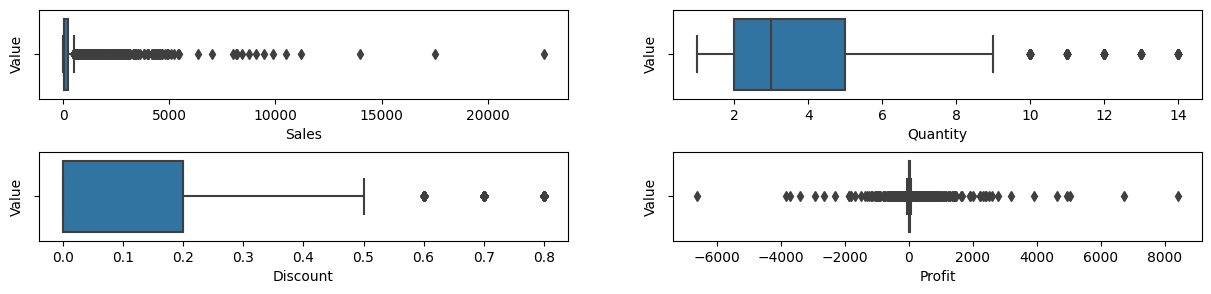

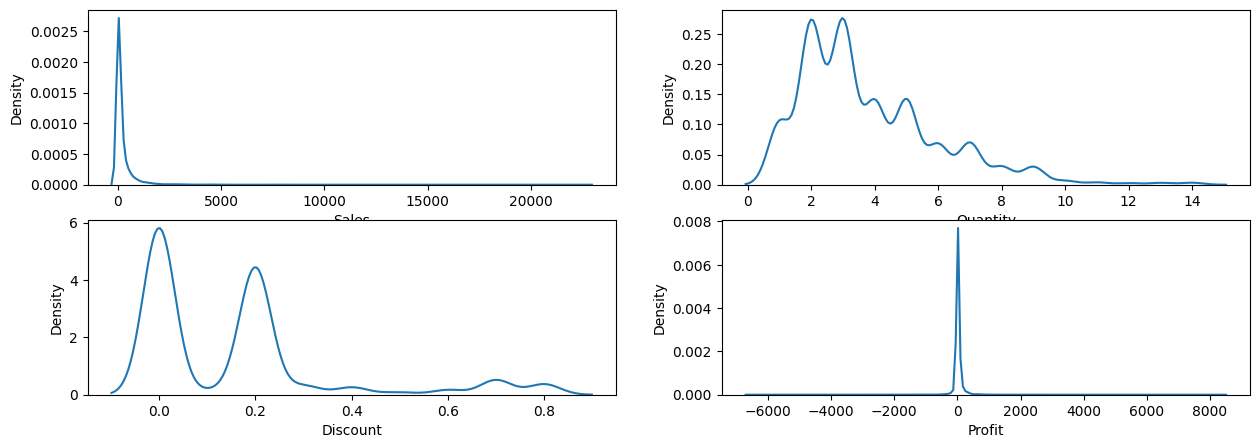

In [16]:
# percentage outlier
for col in df[num_list].columns:
    
    # Identify the outliers using Z-score method
    z_scores = stats.zscore(df[num_list][col])
    outliers_index = np.where(np.abs(z_scores) > 3)
    outliers = df[num_list].iloc[outliers_index]
    
    # calculate the percentage of outliers
    outliers_percentage = len(outliers) / len(df[num_list][col]) * 100
    print(" {} : {:.2f}%".format(col, outliers_percentage))
    
# Boxplot outlier
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,3), gridspec_kw={'hspace': 0.6})
axes = axes.flatten()

for i, column in enumerate(df[num_list].columns):
    # Create a boxplot of the column
    sns.boxplot(x=df[num_list][column], ax=axes[i])
    # Add a title to the plot
    axes[i].set_ylabel("Value")

# check data distribution
plt.figure(figsize=(15,5), )
for i, col in enumerate(df[num_list].columns):
    if df[num_list][col].dtype != 'object':
        ax = plt.subplot(2, 2, i+1)
        sns.kdeplot(df[num_list][col], ax=ax)
        plt.xlabel(col)
plt.show()

In [17]:
df[num_list].columns.tolist()

['Sales', 'Quantity', 'Discount', 'Profit']

### Remove Outliers

 Sales : 2.75%
 Quantity : 0.00%
 Discount : 0.07%
 Profit : 1.25%


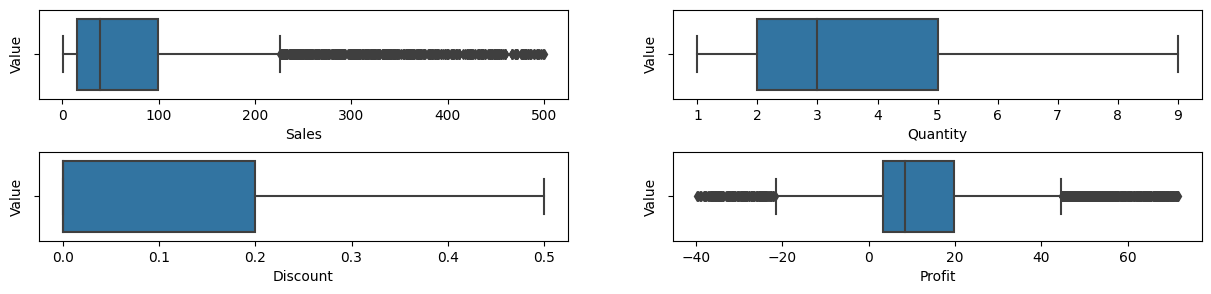

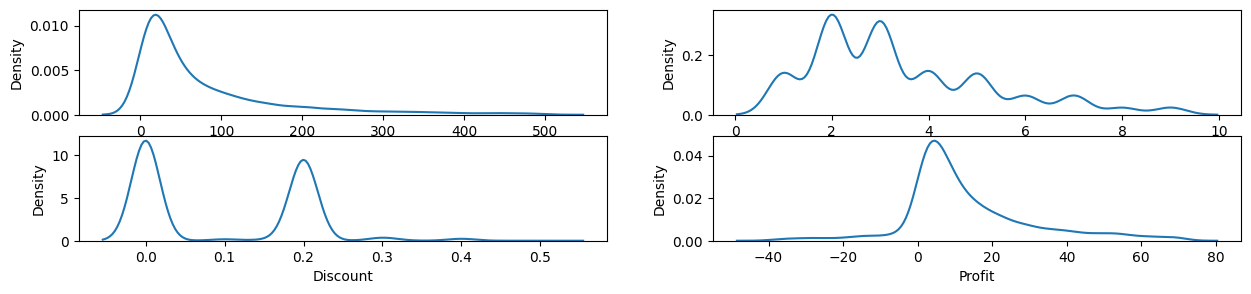

In [18]:
# calculate the interquartile range (IQR) for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# outliers into index array
outl_index = df[num_list][((df[num_list] < (Q1 - 1.5 * IQR)) |(df[num_list] > (Q3 + 1.5 * IQR))).any(axis=1)].index.tolist()

# drop outlier from dataset
df2 = df.drop(index=outl_index, axis=1)

# percentage outlier
for col in df2[num_list].columns:
    # Identify the outliers using Z-score method
    z_scores = stats.zscore(df2[num_list][col])
    outliers_index = np.where(np.abs(z_scores) > 3)
    outliers = df2[num_list].iloc[outliers_index]
    # calculate the percentage of outliers
    outliers_percentage = len(outliers) / len(df2[num_list][col]) * 100
    print(" {} : {:.2f}%".format(col, outliers_percentage))
    
# Boxplot outlier
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,3), gridspec_kw={'hspace': 0.6})
axes = axes.flatten()

for i, column in enumerate(df[num_list].columns):
    # Create a boxplot of the column
    sns.boxplot(x=df2[num_list][column], ax=axes[i])
    # Add a title to the plot
    axes[i].set_ylabel("Value")

# check data distribution
plt.figure(figsize=(15,3))
for i, col in enumerate(df2[num_list].columns):
    if df2[num_list][col].dtype != 'object':
        ax = plt.subplot(2, 2, i+1)
        sns.kdeplot(df2[num_list][col], ax=ax)
        plt.xlabel(col)
plt.show()

In [19]:
df = df2

```Statement :```  
There are still outliers, at least it decreased. It's generally not a good idea to remove outliers multiple times, as it can lead to a significant loss of data. It's important to consider the context and purpose of the analysis before removing any outliers twice.

________________
# V. Exploratory Data Analysis

In [20]:
df.head()

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.960,2,0.0,41.9136
2,Second Class,Corporate,California,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.368,2,0.2,2.5164
5,Standard Class,Consumer,California,West,Furniture,Furnishings,48.860,7,0.0,14.1694
6,Standard Class,Consumer,California,West,Office Supplies,Art,7.280,4,0.0,1.9656


<AxesSubplot: >

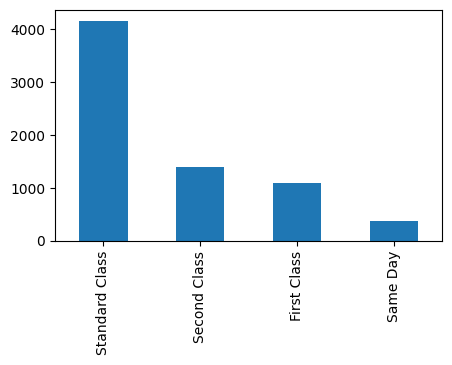

In [21]:
# Ship Mode distribution

df['Ship Mode'].value_counts().plot(kind='bar', figsize=(5,3))

Standard class is the most shipment method choosen by the customer due to the affordable price.

([<matplotlib.patches.Wedge at 0x272ebd8fd00>,
 [Text(-0.07368069423533584, 1.0975295692130573, 'Consumer'),
  Text(-0.5235420226955374, -0.9674211856641685, 'Corporate'),
  Text(0.9301804069927001, -0.5871664248293623, 'Home Office')],
 [Text(-0.040189469582910455, 0.5986524922980312, '52.1%'),
  Text(-0.28556837601574764, -0.5276842830895464, '29.9%'),
  Text(0.5073711310869272, -0.3202725953614703, '17.9%')])

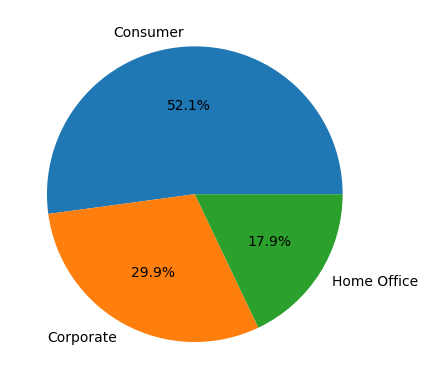

In [22]:
# Segment Distribution
plt.pie(df['Segment'].value_counts(), labels=df['Segment'].unique().tolist(), autopct='%0.1f%%',radius=1)

The most customer segment is personal consumer with 51% of total customer, while corporate and home office is 30% and 18%.

0
State      Segment         
California Consumer     810
           Corporate    476
           Home Office  258
New York   Consumer     492
           Corporate    240
           Home Office  129
Texas      Consumer     293
           Corporate    170
           Home Office   80

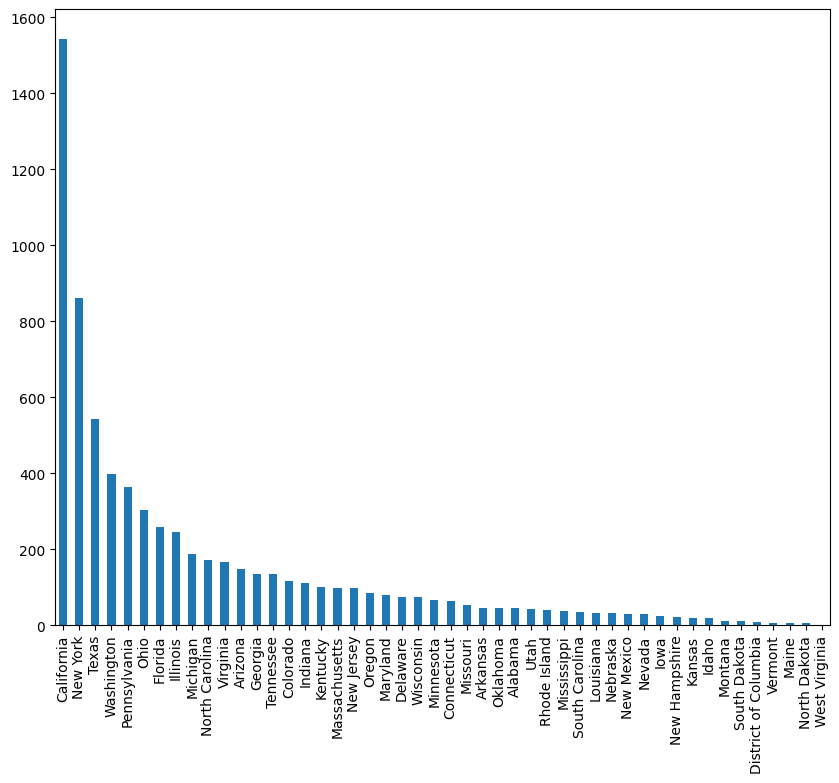

In [23]:
# Top 3 State of Customer Segment

df['State'].value_counts(ascending=False).plot(kind='bar', figsize=(10,8))
pd.DataFrame(df[(df['State'] == 'California') | (df['State'] == 'New York') | (df['State'] == 'Texas')][['State', 'Segment']].groupby(by=['State']).value_counts())

([<matplotlib.patches.Wedge at 0x272ec1a18d0>,
 [Text(0.5153092289580243, 0.97183146612501, 'South'),
  Text(-1.0972937144420598, 0.0771135801655432, 'West'),
  Text(-0.11286262714015696, -1.094194693550934, 'Central'),
  Text(0.9545067127040262, -0.5467329653523314, 'East')],
 [Text(0.2810777612498314, 0.5300898906136418, '34.5%'),
  Text(-0.5985238442411235, 0.04206195281756901, '28.8%'),
  Text(-0.061561432985540156, -0.5968334692096002, '20.2%'),
  Text(0.5206400251112869, -0.2982179811012716, '16.6%')])

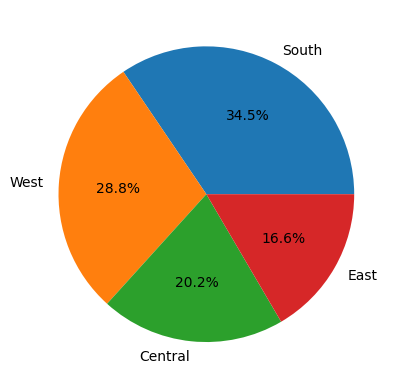

In [24]:
plt.pie(df['Region'].value_counts(), labels=df['Region'].unique().tolist(), autopct='%0.1f%%',radius=1)

Text(0.5, 1.0, 'Product Category based on customer interest')

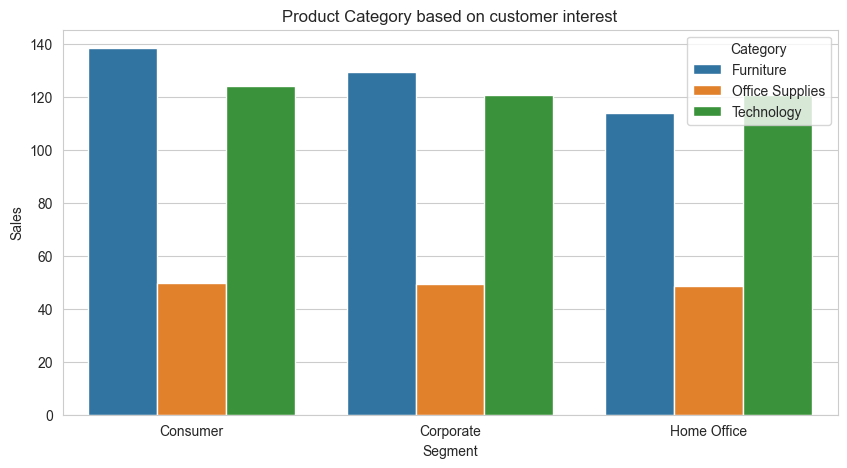

In [25]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.barplot(x="Segment", y="Sales", hue='Category', data=df, errorbar=None, width=0.8).set_title('Product Category based on customer interest')

Technology and furniture are the high demand product, while office supplies are the stay in low level in 3 customer segments.

Text(0.5, 1.0, 'Profit vs. sales according to category')

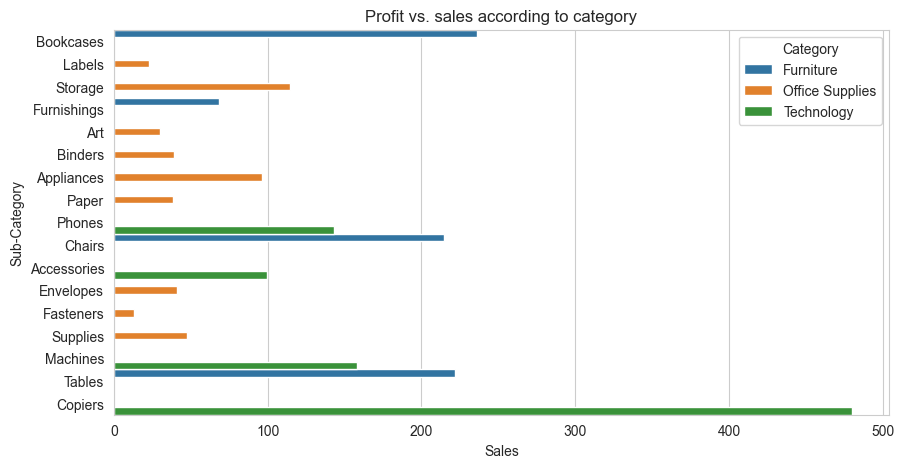

In [26]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.barplot(x="Sales", y="Sub-Category", hue='Category', data=df, errorbar=None, width=1).set_title('Profit vs. sales according to category')

Copiers and other machines are the technology category with the highest sales, while furniture has table and chairs as the most favorite.

In [27]:
# Category and Sub-Category
df[['Category', 'Sub-Category']].groupby(['Category','Sub-Category']).value_counts()

Category         Sub-Category
Furniture        Bookcases        111
                 Chairs           318
                 Furnishings      733
                 Tables            92
Office Supplies  Appliances       298
                 Art              772
                 Binders          777
                 Envelopes        226
                 Fasteners        211
                 Labels           336
                 Paper           1165
                 Storage          630
                 Supplies         172
Technology       Accessories      599
                 Copiers            3
                 Machines          17
                 Phones           570
dtype: int64

Text(0.5, 1.0, 'Profit vs. sales according to category')

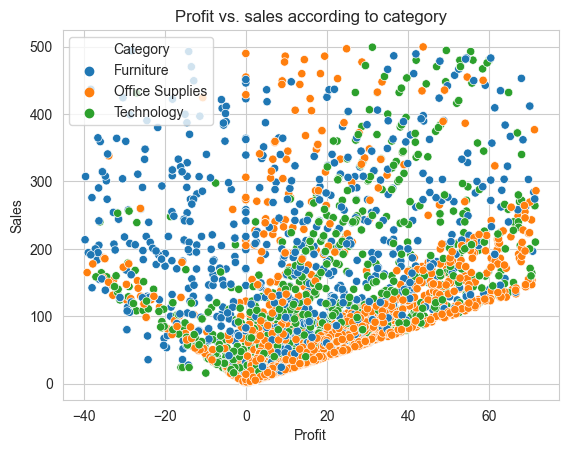

In [28]:
sns.scatterplot(x="Profit", y="Sales", hue='Category', data=df,).set_title('Profit vs. sales according to category')

The profit below 0 indicates that the sales are below Cost of Goods Sold (COGS), which means superstore sold the products below the COGS. In this plot, technology category is the intresting one, in one side it has the lowest profit profit but in other side it has the highest profit.

Text(0.5, 1.0, 'Profit vs. sales according to Technology')

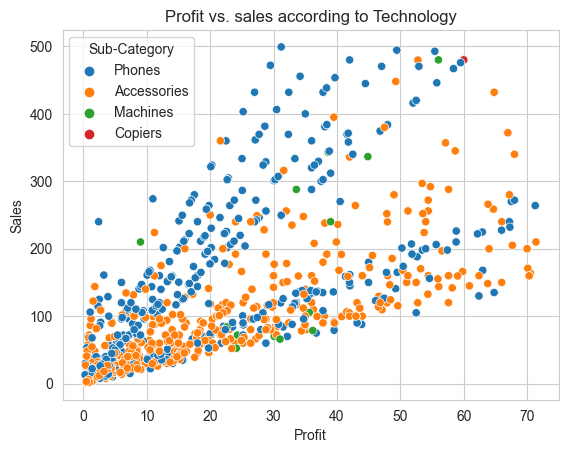

In [29]:
zz = df.loc[(df['Category'] == 'Technology') & (df['Profit'] > 0)][['Segment', 'Sub-Category', 'Sales', 'Profit']]
sns.scatterplot(x="Profit", y="Sales", hue='Sub-Category', data=zz,).set_title('Profit vs. sales according to Technology')

Text(0.5, 1.0, 'Profit vs. sales according to category')

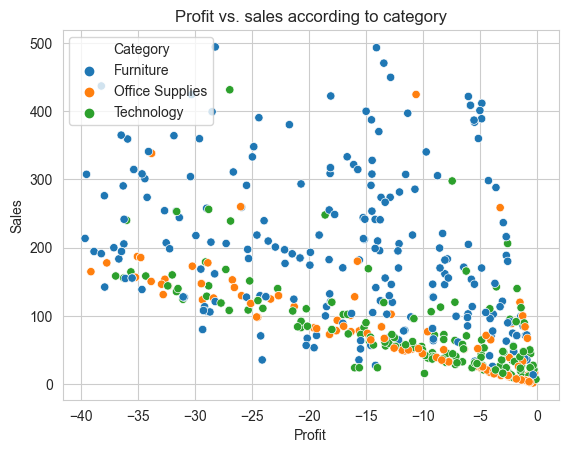

In [30]:
zz = df.loc[ (df['Profit'] < 0)][['Segment', 'Category', 'Sales', 'Profit']]
sns.scatterplot(x="Profit", y="Sales", hue='Category', data=zz,).set_title('Profit vs. sales according to category')

Same as previous graph, this plot shows only technology but the category with profit in below zero. The tendency of profit loss are in office supplies and technology. The lower sales, higher the profit loss.

Text(0.5, 1.0, 'Sales vs. Category according to Region')

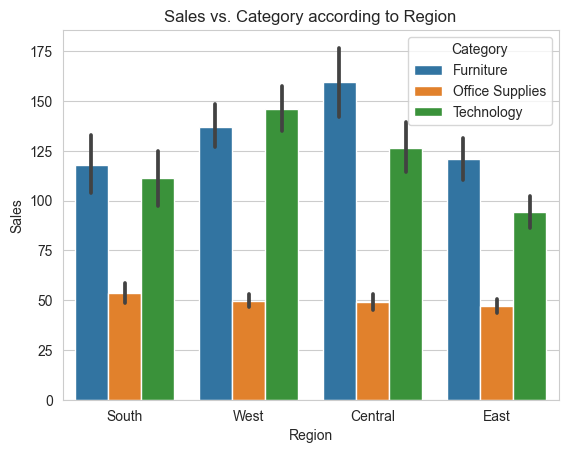

In [31]:
sns.barplot(x="Region", y="Sales", hue='Category', data=df).set_title('Sales vs. Category according to Region')

Same with customer segment, furniture and technology are the most favorite in 4 state region.

In [32]:
df[['Category', 'Sub-Category', 'Sales', 'Discount', 'Profit']].sort_values(by='Profit').groupby(['Category','Sub-Category']).agg(['min','max','mean']).round(2)

Sales                 Discount             \
                                 min     max    mean      min  max  mean   
Category        Sub-Category                                               
Furniture       Bookcases      35.49  459.92  236.33      0.0  0.5  0.14   
                Chairs         26.64  492.84  214.48      0.0  0.3  0.18   
                Furnishings     2.78  466.32   68.26      0.0  0.2  0.06   
                Tables         24.37  493.92  222.08      0.0  0.5  0.22   
Office Supplies Appliances      2.22  499.58   96.32      0.0  0.2  0.07   
                Art             1.34  264.18   29.98      0.0  0.2  0.08   
                Binders         1.34  209.60   39.02      0.0  0.2  0.13   
                Envelopes       1.63  223.89   41.07      0.0  0.2  0.09   
                Fasteners       1.24   55.10   12.94      0.0  0.2  0.08   
                Labels          2.09  152.65   23.07      0.0  0.2  0.07   
                Paper           3.38  223.06   38.34      0.0  0.2  0.08   
                Storage         4.46  496.86  114.23      0.0  0.2  0.08   
                Supplies        1.74  480.74   47.57      0.0  0.2  0.07   
Technology      Accessories     0.99  479.94   99.70      0.0  0.2  0.09   
                Copiers       479.98  479.98  479.98      0.2  0.2  0.20   
                Machines       11.56  479.99  157.77      0.0  0.5  0.24   
                Phones          2.97  499.17  143.41      0.0  0.4  0.16   

                             Profit                
                                min    max   mean  
Category        Sub-Category                       
Furniture       Bookcases    -37.94  69.68   9.78  
                Chairs       -39.64  70.98   7.77  
                Furnishings  -36.47  71.23  14.69  
                Tables       -39.51  70.01   2.07  
Office Supplies Appliances     0.29  71.16  20.89  
                Art            0.15  71.25   7.22  
                Binders        0.47  70.55  15.31  
                Envelopes      0.55  69.96  16.89  
                Fasteners    -11.83  21.60   4.16  
                Labels         0.68  70.22  10.16  
                Paper          1.07  69.70  16.19  
                Storage      -39.12  71.54   8.56  
                Supplies     -34.76  36.81   4.78  
Technology      Accessories  -35.99  71.39  18.62  
                Copiers       60.00  60.00  60.00  
                Machines      -7.20  56.00  24.58  
                Phones       -36.95  71.27  16.18

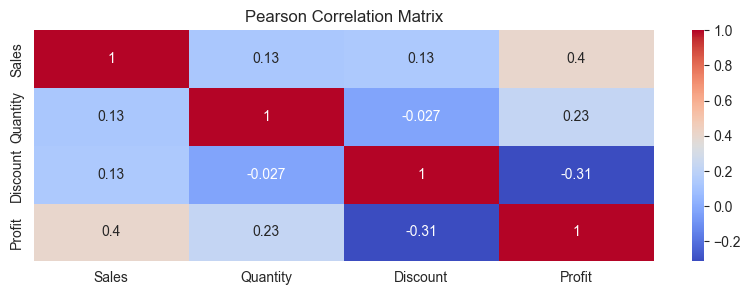

In [33]:
corr_matrix = df.corr(method='pearson')
plt.figure(figsize=(10,3))
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 10}, cmap='coolwarm').set_title('Pearson Correlation Matrix')
plt.show()

Discount has strong correlation to the profit. Which means discount influences customer to buy but sales by the discount influences profit. The higher discount, will lower the sales that might to same value with COGS as the result the store has lower profit. This might be good in some occassions such as gaining customer trust or for promo sale, but not good in store cash flow might lead to profit loss.

______
# VI. Clustering Algorithm

### K-Means

KMeans clustering is an unsupervised clustering algorithm which groups together similar data in same cluster to form k clusters. As a result we get groups of similar records which can then be labelled and acted upon accordingly.

The objective in this data clustering is to find pattern of the clusters and the lowest one will be maximazed in the near future for marketing plan upon it.

In [34]:
num_list = ['Sales', 'Quantity', 'Discount', 'Profit']
cat_list = ['Ship Mode','Segment','State','Region','Category','Sub-Category']

In [35]:
# initiate feature engineering
scaler = StandardScaler()
encoder = OrdinalEncoder()

# scaling numerical feature
df_scl = scaler.fit_transform(df[num_list])

# encoding categorical feature
df_enc = encoder.fit_transform(df[cat_list])

# assign to new dataframe
df2 = pd.DataFrame(np.concatenate([df_scl, df_enc], axis=1), columns=df[num_list].columns.tolist()+df[cat_list].columns.tolist()).round(2)


In [36]:
df2

,Sales,Quantity,Discount,Profit,Ship Mode,Segment,State,Region,Category,Sub-Category
0,2.00,-0.75,-0.91,1.66,2.0,0.0,15.0,2.0,0.0,4.0
1,-0.67,-0.75,-0.91,-0.36,2.0,1.0,3.0,3.0,1.0,10.0
2,-0.58,-0.75,0.97,-0.61,3.0,0.0,8.0,2.0,1.0,14.0
3,-0.30,1.90,-0.91,0.06,3.0,0.0,3.0,3.0,0.0,9.0
4,-0.75,0.31,-0.91,-0.64,3.0,0.0,3.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
7025,1.40,0.84,-0.91,2.45,3.0,1.0,9.0,2.0,2.0,13.0
7026,-0.55,-0.22,0.97,-0.52,2.0,0.0,8.0,2.0,0.0,9.0
7027,0.17,-0.75,-0.91,0.14,3.0,0.0,3.0,3.0,0.0,9.0
7028,1.97,-0.75,0.97,0.36,3.0,0.0,3.0,3.0,2.0,13.0


### Elbow Technique

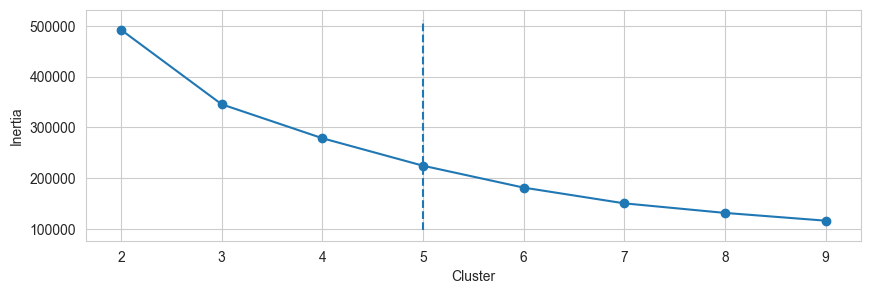

In [37]:
c = range(2,10)
inertia = [KMeans(n_clusters=i, random_state=np.random.randint(1,1000), n_init=i).fit(df2).inertia_ for i in c]
kneedle = KneeLocator(c, inertia, S=1, curve="convex", direction='decreasing') # --> elbow point

# display in plot
plt.figure(figsize=(10,3))
plt.plot(c,inertia,'o-')
plt.vlines(kneedle.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed') # --> elbow point
plt.xlabel('Cluster')
plt.ylabel('Inertia')
plt.show()

According to kneedle matrix, the optimal cluster is 4 but we need to find how good is the score of cluster whether it is less represents features of whole dataset or is it too much. We may find the score by silhouette score to find the optimal cluster.

### Silhouette Score

In [38]:
c = range(2,10)
for i in c :
    kmeans = KMeans(n_clusters=i, random_state=np.random.randint(1,100))
    labels = kmeans.fit_predict(df2)
    silhouette_avg = silhouette_score(df2, labels)
    print("For cluster =", i, ", silhouette_score  :", silhouette_avg.round(3))


For cluster = 2 , silhouette_score  : 0.612
For cluster = 3 , silhouette_score  : 0.463
For cluster = 4 , silhouette_score  : 0.392
For cluster = 5 , silhouette_score  : 0.385
For cluster = 6 , silhouette_score  : 0.391
For cluster = 7 , silhouette_score  : 0.407
For cluster = 8 , silhouette_score  : 0.415
For cluster = 9 , silhouette_score  : 0.415


In silhouette score, the score close to 1 represents all the features. As the score result above, the score that close to 1 is on cluster 2 with 0.6. This might be inaccurate to determine which cluster is optimal because the two different techniques showed different result and better not to judge by personal assumption tha may lead to bad model. We can reduce the dimension in order to shrink the decision which cluster is optimal by using Principal Component Analysis (PCA) as a final decision to determine optimal cluster.

### Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a technique used to reduce the dimensionality of a data set. It does this by identifying the directions (components) in the data that explain the most variance, and then projecting the data onto a lower-dimensional subspace along those directions. This can be useful for data visualization, data compression, and feature selection.

{2: 0.9737, 3: 0.9795, 4: 0.9839, 5: 0.988, 6: 0.9919, 7: 0.9951, 8: 0.9973, 9: 0.9989}


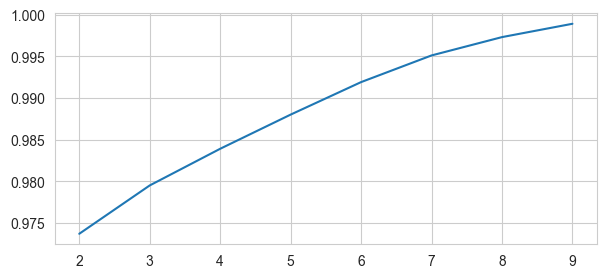

In [39]:
# PCA
var_ratio={}
c = range(2,10)
for n in c:
    pc = PCA(n_components=n)
    cr_pca = pc.fit(df2)
    var_ratio[n] = sum(cr_pca.explained_variance_ratio_).round(4)

pd.Series(var_ratio).plot(figsize=(7,3), grid=True)
print(var_ratio)

As the graph depicted, higher the score, it closer to percentage dataset representation. We can choose 9 because it has the highest number with 99% dataset dimension, but our goal is to reduce the dimension to ease indentifying patterns in the data and transforming it into a new coordinate system.  

We can choose 2 cluster since it still represents 97% of whole dimension of dataset.

In [40]:
# set 2 cluster

pc_final = PCA(n_components=2).fit(df2)
reduced_cr = pc_final.fit_transform(df2)

In [41]:
# assgin cluster into algorithm

km_2 = KMeans(n_clusters=2, 
              random_state=np.random.randint(1,100), 
              init='random', n_init=2,
              algorithm='full', 
              max_iter=1)

labels_2 = km_2.fit_predict(df2)
cluster = km_2.labels_ 

In [42]:
# assign to new dataframe
df3 = pd.DataFrame(np.concatenate([pd.DataFrame(cluster), df], axis=1), columns=['cluster']+df.columns.tolist())

In [43]:
best_feat = ['cluster', 'Category', 'Sales', 'Discount', 'Profit']

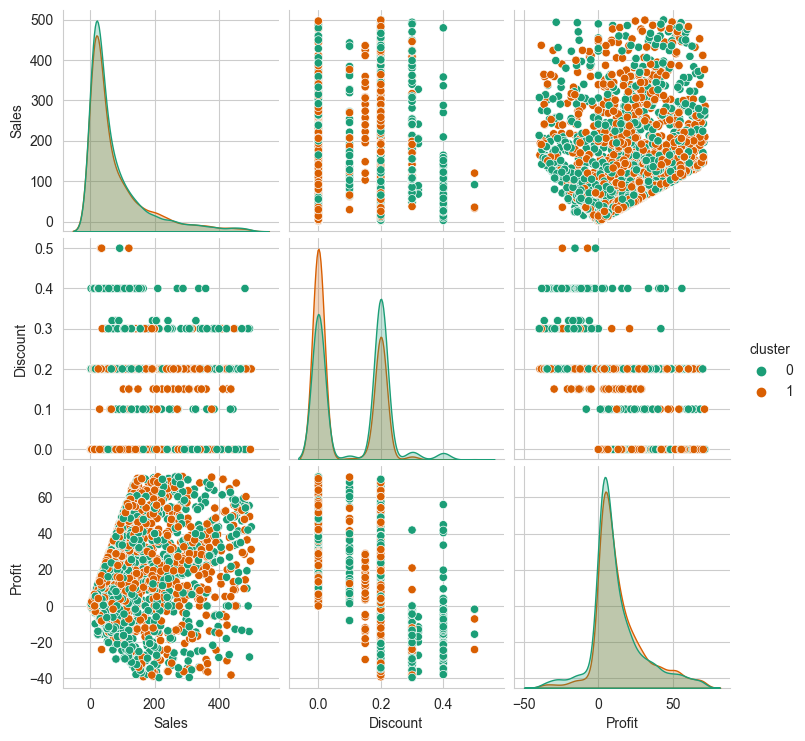

In [44]:
# make a Seaborn pairplot
sns.pairplot(data=df3[best_feat], hue='cluster', palette= 'Dark2', diag_kind='kde')

In [45]:
df3['profit_ratio'] = ((df3['Profit'] / df3['Sales']) * 100)

In [46]:
df3.head()

,cluster,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,profit_ratio
0,1,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.96,2,0.0,41.9136,16.0
1,1,Second Class,Corporate,California,West,Office Supplies,Labels,14.62,2,0.0,6.8714,47.0
2,1,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.368,2,0.2,2.5164,11.25
3,1,Standard Class,Consumer,California,West,Furniture,Furnishings,48.86,7,0.0,14.1694,29.0
4,1,Standard Class,Consumer,California,West,Office Supplies,Art,7.28,4,0.0,1.9656,27.0


Text(0.5, 1.0, 'Profit Ratio according to category per cluster')

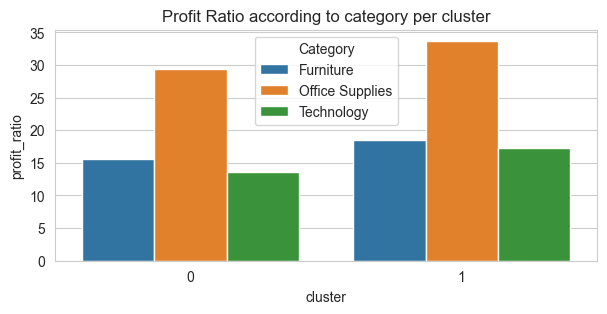

In [47]:
plt.figure(figsize=(7,3))
sns.set_style("whitegrid")
sns.barplot(x='cluster', y='profit_ratio', hue='Category', data=df3, errorbar=None).set_title('Profit Ratio according to category per cluster')

Text(0.5, 1.0, 'Profit Ratio according to segment per cluster')

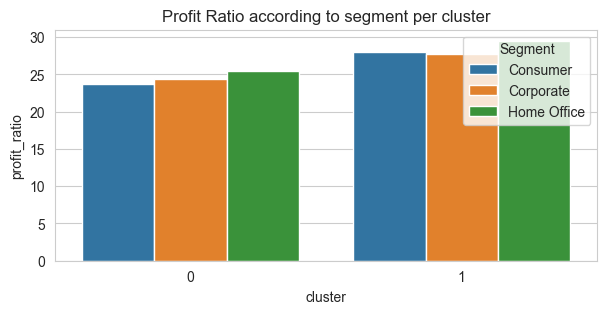

In [48]:
plt.figure(figsize=(7,3))
sns.set_style("whitegrid")
sns.barplot(x='cluster', y='profit_ratio', hue='Segment', data=df3, errorbar=None).set_title('Profit Ratio according to segment per cluster')

Text(0.5, 1.0, 'Profit Ratio according to Region per cluster')

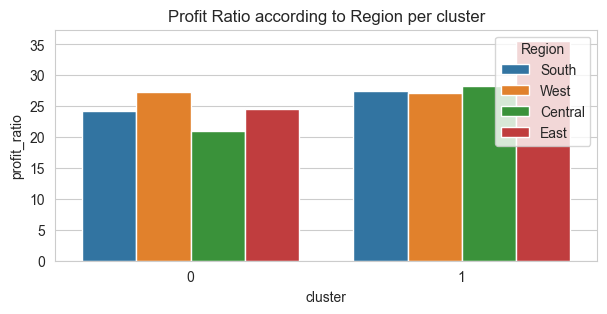

In [49]:
plt.figure(figsize=(7,3))
sns.set_style("whitegrid")
sns.barplot(x='cluster', y='profit_ratio', hue='Region', data=df3, errorbar=None).set_title('Profit Ratio according to Region per cluster')

Text(0.5, 1.0, 'Profit Ratio according to Region per cluster')

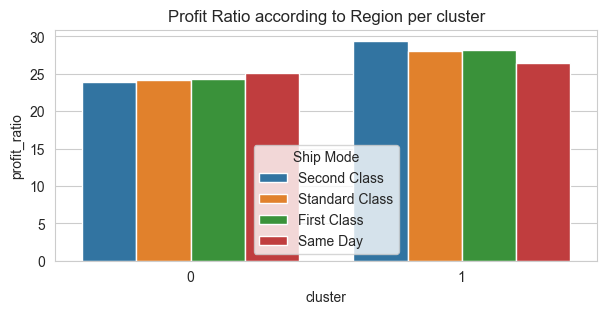

In [50]:
plt.figure(figsize=(7,3))
sns.set_style("whitegrid")
sns.barplot(x='cluster', y='profit_ratio', hue='Ship Mode', data=df3, errorbar=None).set_title('Profit Ratio according to Region per cluster')

Text(0.5, 1.0, 'Segment vs Region')

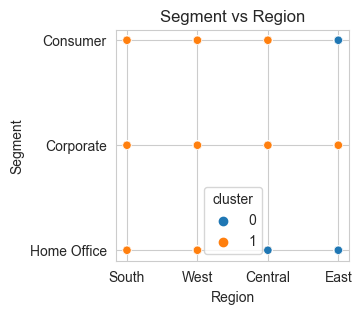

In [191]:
plt.figure(figsize=(3,3))
sns.scatterplot(x="Region", y="Segment", hue='cluster', data=df3).set_title('Segment vs Region')

In [51]:
df3.head()

,cluster,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,profit_ratio
0,1,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.96,2,0.0,41.9136,16.0
1,1,Second Class,Corporate,California,West,Office Supplies,Labels,14.62,2,0.0,6.8714,47.0
2,1,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.368,2,0.2,2.5164,11.25
3,1,Standard Class,Consumer,California,West,Furniture,Furnishings,48.86,7,0.0,14.1694,29.0
4,1,Standard Class,Consumer,California,West,Office Supplies,Art,7.28,4,0.0,1.9656,27.0


In [52]:
# Country in cluster 0

df3[df3['cluster'] == 0][['Region', 'State', 'profit_ratio']].groupby(by=['Region', 'State']).mean().round(2)

profit_ratio
Region  State                       
Central Missouri               35.41
        Nebraska               34.65
        North Dakota           38.00
        Oklahoma               36.93
        South Dakota           39.20
        Texas                  15.22
        Wisconsin              33.23
East    New Hampshire          35.62
        New Jersey             33.61
        New York               31.77
        Ohio                   13.68
        Pennsylvania           12.44
        Rhode Island           33.27
        Vermont                41.83
        West Virginia          49.00
South   Mississippi            33.76
        North Carolina         16.72
        South Carolina         33.53
        Tennessee              15.86
        Virginia               34.57
West    Montana                31.36
        Nevada                 35.34
        New Mexico             29.02
        Oregon                 16.12
        Utah                   31.89
        Washington             28.34

In [53]:
# Country in cluster 1

df3[df3['cluster'] == 1][['Region', 'State', 'profit_ratio']].groupby(by=['Region', 'State']).mean().round(2)

profit_ratio
Region  State                             
Central Illinois                     15.92
        Indiana                      35.56
        Iowa                         43.04
        Kansas                       32.60
        Michigan                     34.56
        Minnesota                    37.19
East    Connecticut                  34.84
        Delaware                     36.13
        District of Columbia         43.75
        Maine                        34.40
        Maryland                     35.02
        Massachusetts                35.53
South   Alabama                      33.84
        Arkansas                     38.53
        Florida                      17.03
        Georgia                      34.57
        Kentucky                     34.54
        Louisiana                    34.91
West    Arizona                      14.37
        California                   29.16
        Colorado                     15.69
        Idaho                        28.38

0    3599
1    3431
Name: cluster, dtype: int64

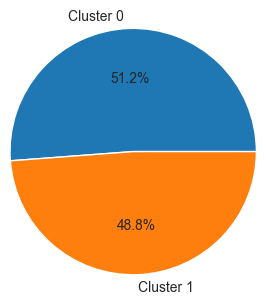

In [54]:
# Cluster distribution

plt.figure(figsize=(2,2))
plt.pie(df3['cluster'].value_counts(),labels=['Cluster 0 ','Cluster 1'],autopct='%0.1f%%',radius=2)
df3['cluster'].value_counts()

### Cluster Summary

    The number of cluster 0 is more than the number of cluster 1. In all aspect, cluster 0 is lower value than cluster 1 that indicates the customer with middle level economoy is more than the customer with high level economy. Though cluster 1 are the high level economy people, but customer in cluster 1 are the biggest contributor of profit to the the store.  

    One interesting point, as we saw the previous graph of top 3 states with highest sales, Texas is one of them. Though Texas is top 3 state in sales contribution, but it has the lowest profit. It is interesting to observed more of the states in Central region especially Texas. Compareed to all region, Central region contributes the biggest profit loss both in cluster 0 or cluster 1 which are Texas and Illinois.

    In near future plan, our marketing team will examine more to maximize sales especially to gain more sales from customers in cluster 0. In further analysis, we will focus highlighting the cluster 0 for future sales prediction.

____________
# VII. Classifying Cluster using Classification Algorithm

Since there are 2 clusters, we can make the cluster into target in classification prediciton. As we saw the cluster distribution on pie plot in the previous section, is pretty well balanced. We can go to target cluster predicition with this.

0    3599
1    3431
Name: cluster, dtype: int64

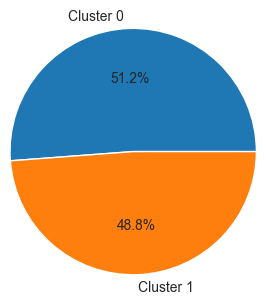

In [55]:
# Cluster distribution

plt.figure(figsize=(2,2))
plt.pie(df3['cluster'].value_counts(),labels=['Cluster 0 ','Cluster 1'],autopct='%0.1f%%',radius=2)
df3['cluster'].value_counts()

In [56]:
# dataset after clustering
df3.head()

,cluster,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,profit_ratio
0,1,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.96,2,0.0,41.9136,16.0
1,1,Second Class,Corporate,California,West,Office Supplies,Labels,14.62,2,0.0,6.8714,47.0
2,1,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.368,2,0.2,2.5164,11.25
3,1,Standard Class,Consumer,California,West,Furniture,Furnishings,48.86,7,0.0,14.1694,29.0
4,1,Standard Class,Consumer,California,West,Office Supplies,Art,7.28,4,0.0,1.9656,27.0


### Feature Engineering

In [57]:
df3['Sales'] = df3['Sales'].astype(float)
df3['Quantity'] = df3['Quantity'].astype(float)
df3['Discount'] = df3['Discount'].astype(float)
df3['Profit'] = df3['Profit'].astype(float)
df3['profit_ratio'] = df3['profit_ratio'].astype(float)
df3['cluster'] = df3['cluster'].astype(int)

In [58]:
df4 = df3[['cluster','Segment','Region', 'Category', 'Sub-Category', 'Sales', 'Discount','Profit']]
num_l = ['Sales', 'Discount','Profit']
cat_l = ['Segment','Region','Category', 'Sub-Category']

In [59]:
df4.head()

,cluster,Segment,Region,Category,Sub-Category,Sales,Discount,Profit
0,1,Consumer,South,Furniture,Bookcases,261.960,0.0,41.9136
1,1,Corporate,West,Office Supplies,Labels,14.620,0.0,6.8714
2,1,Consumer,South,Office Supplies,Storage,22.368,0.2,2.5164
3,1,Consumer,West,Furniture,Furnishings,48.860,0.0,14.1694
4,1,Consumer,West,Office Supplies,Art,7.280,0.0,1.9656


In [60]:
# scaling
scaler = StandardScaler()
x_n_scl = scaler.fit_transform(df4[num_l])

# encoding
encoder = OrdinalEncoder()
x_c_enc = encoder.fit_transform(df4[cat_l])

# concatenate
dtt = pd.DataFrame(np.concatenate([x_c_enc, x_n_scl, df4[['cluster']]],axis=1), columns=df4[cat_l].columns.tolist()+df4[num_l].columns.tolist()+['cluster'])

# split into target (x) and feature (y)
x = dtt.drop('cluster', axis=1)
y = dtt['cluster']

# split data to train-set and test-set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=15)

print('x_train', x_train.shape)
print('x_test', x_test.shape)

x_train (6327, 7)
x_test (703, 7)


In [61]:
x_test.head()

,Segment,Region,Category,Sub-Category,Sales,Discount,Profit
9,0.0,3.0,1.0,2.0,-0.732234,-0.909360,-0.613467
4106,0.0,1.0,1.0,10.0,-0.790609,-0.909360,-0.669332
5959,2.0,2.0,2.0,0.0,-0.334637,0.970792,-0.070173
5279,1.0,2.0,1.0,1.0,-0.472083,-0.909360,-0.267371
1836,1.0,2.0,1.0,1.0,-0.749153,0.970792,-0.726188


### Predicting cluster using Random Forest

In [62]:
# Finding best parameter

param_rf = {'n_estimators': np.arange(1,251),
            'max_features': np.arange(1, 11),
            'max_depth': np.arange(1, 16),
            'criterion': ["gini", "entropy"]}

# initiate model
rf_hyp = RandomForestClassifier()

# cross-validation & stratified k-fold
skf_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=np.random.randint(2,1000))

# initiate random search cv
rf_cv = RandomizedSearchCV(rf_hyp, param_distributions = param_rf,
                           cv = skf_rf, random_state=np.random.randint(2,1000), n_jobs = -1)

rf_cv.fit(x_train, y_train)

print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))


Tuned Random Forest Parameters: {'n_estimators': 217, 'max_features': 9, 'max_depth': 4, 'criterion': 'gini'}


In [63]:
# Define the steps of the pipeline

pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=201,
                                            max_features=7,
                                            max_depth=6,
                                            criterion='entropy'))])

# Fit the pipeline to the training data
pipe_rf.fit(x_train, y_train)
# Use the pipeline to make predictions on the test set
y_pred_rf = pipe_rf.predict(x_test)
print('Random Forest classification report train-set :')
print(classification_report(y_test, y_pred_rf))

#cross validation score
print('cross validation score :', (cross_val_score(pipe_rf.fit(x_train, y_train), x_test, y_test, cv=skf_rf)).mean().round(2)*100, '%')

Random Forest classification report train-set :
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74       352
         1.0       0.73      0.79      0.76       351

    accuracy                           0.75       703
   macro avg       0.76      0.75      0.75       703
weighted avg       0.76      0.75      0.75       703

cross validation score : 74.0 %


### Predicting cluster using Logistic Regression

In [64]:
# find hyperparameter.
warnings.filterwarnings("ignore", category=UserWarning)

param_logreg = {'penalty' : ['l2', None],
                'C' : scipy.stats.expon(scale=1.0),
                'fit_intercept' : [True, False],
                'solver' : ['newton-cg', 'lbfgs'],
                'max_iter': np.arange(1,100000)}

# initiate model
logreg_hyp = LogisticRegression()

# cross-validation & stratified k-fold
skf_logreg = StratifiedKFold(n_splits=5, shuffle=True, random_state=np.random.randint(2,1000))

# initiate the randomized search cv
logreg_cv = RandomizedSearchCV(logreg_hyp, param_distributions=param_logreg, cv=skf_logreg, random_state=np.random.randint(1,101))

# fit to data
logreg_cv.fit(x_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))

Tuned Logistic Regression Parameters: {'C': 0.2243988339994251, 'fit_intercept': True, 'max_iter': 98515, 'penalty': None, 'solver': 'newton-cg'}


In [88]:
# Define the steps of the pipeline
pipe_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(penalty='l2',
                                    C=0.198140312248739876,
                                    fit_intercept=True,
                                    solver='newton-cg',
                                    max_iter=88464))])

# Fit the pipeline to the training data
pipe_logreg.fit(x_train, y_train)

# Use the pipeline to make predictions on the test set
y_pred_logreg = pipe_logreg.predict(x_test)
print('Logistic Regression classification report train-set :')
print(classification_report(y_test, y_pred_logreg))

#cross validation score
print('cross validation score :', (cross_val_score(pipe_logreg.fit(x_train, y_train), x_test, y_test, cv=skf_logreg)).mean().round(2)*100, '%')

Logistic Regression classification report train-set :
              precision    recall  f1-score   support

         0.0       0.70      0.77      0.73       352
         1.0       0.74      0.66      0.70       351

    accuracy                           0.72       703
   macro avg       0.72      0.72      0.71       703
weighted avg       0.72      0.72      0.71       703

cross validation score : 70.0 %


### Predicting Cluster using SVM

In [66]:
# finding parameter

param_svm = {'C': scipy.stats.expon(scale=100),
             'gamma': scipy.stats.expon(scale=.1),
             'kernel': ['rbf', 'sigmoid'],
             'class_weight':['balanced', None]}

# initiate model
svm_hyp = SVC()

# cross-validation & stratified k-fold
skf_svm = StratifiedKFold(n_splits=5, shuffle=True, random_state=np.random.randint(2,1000))

# initiate the randomized search cv
svm_cv = RandomizedSearchCV(svm_hyp, param_distributions=param_svm, cv=skf_svm, random_state=11)

# fit to data
svm_cv.fit(x_train, y_train)

# Print the tuned parameters and score
print("Tuned Support Vector Machine Parameters: {}".format(svm_cv.best_params_))


Tuned Support Vector Machine Parameters: {'C': 11.840211323936508, 'class_weight': None, 'gamma': 0.016859012554710374, 'kernel': 'rbf'}


In [67]:
# Define the steps of the pipeline
pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(C=91.51498735447106,
                gamma=0.15292838722258328,
                kernel='rbf',
                class_weight=None))])

# Fit the pipeline to the training data
pipe_svm.fit(x_train, y_train)

# Use the pipeline to make predictions on the test set
y_pred_svm = pipe_svm.predict(x_test)
print('SVM classification report train-set :')
print(classification_report(y_test, y_pred_svm))

#cross validation score
print('cross validation score :', (cross_val_score(pipe_rf.fit(x_train, y_train), x_test, y_test, cv=skf_svm)).mean().round(2)*100, '%')

SVM classification report train-set :
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73       352
         1.0       0.73      0.77      0.75       351

    accuracy                           0.74       703
   macro avg       0.74      0.74      0.74       703
weighted avg       0.74      0.74      0.74       703

cross validation score : 72.0 %


### Predicting Cluster using Decision Tree

In [68]:
# Finding parameter

param_dt = {"max_depth": np.arange(1,10),
            'max_features': np.arange(1,10),
            'min_samples_leaf': np.arange(1,10),
            'criterion': ["gini", "entropy"]}

# initiate model
dt_hyp = DecisionTreeClassifier()

# cross-validation & stratified k-fold
skf_dt = StratifiedKFold(n_splits=5, shuffle=True, random_state=np.random.randint(2,1000))

# initiate the randomized search cv
dt_cv = RandomizedSearchCV(dt_hyp, param_distributions=param_dt, cv=skf_dt, random_state=np.random.randint(1,1000))

# fit to data
dt_cv.fit(x_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(dt_cv.best_params_))


Tuned Decision Tree Parameters: {'min_samples_leaf': 2, 'max_features': 8, 'max_depth': 3, 'criterion': 'entropy'}


In [69]:
# Define the steps of the pipeline
pipe_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth=3,
                            max_features=9,
                            min_samples_leaf=3,
                            criterion='gini'))])

# Fit the pipeline to the training data
pipe_dt.fit(x_train, y_train)

# Use the pipeline to make predictions on the test set
y_pred_dt = pipe_dt.predict(x_test)
print('Decisition Tree classification report train-set :')
print(classification_report(y_test, y_pred_svm))

#cross validation score
print('cross validation score :', (cross_val_score(pipe_dt.fit(x_train, y_train), x_test, y_test, cv=skf_dt)).mean().round(2)*100, '%')

Decisition Tree classification report train-set :
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73       352
         1.0       0.73      0.77      0.75       351

    accuracy                           0.74       703
   macro avg       0.74      0.74      0.74       703
weighted avg       0.74      0.74      0.74       703

cross validation score : 75.0 %


### Predicting Cluster using Naive Bayes

In [70]:
param_gnb = {'var_smoothing': np.logspace(0,-10, num=200)}

# initiate model
gnb_hyp = GaussianNB()

# cross-validation & stratified k-fold
skf_gnb = StratifiedKFold(n_splits=5, shuffle=True, random_state=np.random.randint(2,1000))

# initiate randomized search cv
gnb_cv = RandomizedSearchCV(gnb_hyp, 
                            param_distributions=param_gnb,
                            cv=skf_gnb,
                            random_state=np.random.randint(1,101))

# fit to data train
gnb_cv.fit(x_train, y_train)

# Print the tuned parameters and score
print("Tuned Naive Bayes Parameters: {}".format(gnb_cv.best_params_))

Tuned Naive Bayes Parameters: {'var_smoothing': 0.06222570836730228}


In [71]:
# Define the steps of the pipeline
pipe_nb = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GaussianNB(var_smoothing=0.06985879746785245))])

# Fit the pipeline to the training data
pipe_nb.fit(x_train, y_train)

# Use the pipeline to make predictions on the test set
y_pred_nb = pipe_nb.predict(x_test)
print('Naive Bayes classification report train-set :')
print(classification_report(y_test, y_pred_nb))

#cross validation score
print('cross validation score :', (cross_val_score(pipe_nb.fit(x_train, y_train), x_test, y_test, cv=skf_gnb)).mean().round(2)*100, '%')

Naive Bayes classification report train-set :
              precision    recall  f1-score   support

         0.0       0.70      0.75      0.72       352
         1.0       0.73      0.67      0.70       351

    accuracy                           0.71       703
   macro avg       0.71      0.71      0.71       703
weighted avg       0.71      0.71      0.71       703

cross validation score : 68.0 %


### Predicting cluster using K-Nearest Neighbour

In [72]:
param_knn = {'leaf_size': np.arange(1,51),
             'n_neighbors' : np.arange(1,51),
             'p' : [1,2]}

# initiate model
knn_hyp = KNeighborsClassifier()

# cross-validation & stratified k-fold
skf_knn = StratifiedKFold(n_splits=5, shuffle=True, random_state=np.random.randint(2,1000))

# initiate randomized search cv
knn_cv = RandomizedSearchCV(knn_hyp,
                            param_distributions=param_knn,
                            cv=skf_knn,
                            random_state=np.random.randint(1,1000))

# fit to data
knn_cv.fit(x_train, y_train)

# Print the tuned parameters and score
print("Tuned KNN Parameters: {}".format(knn_cv.best_params_))

Tuned KNN Parameters: {'p': 1, 'n_neighbors': 44, 'leaf_size': 17}


In [79]:
# Define the steps of the pipeline
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(leaf_size=14,
                                      n_neighbors=37,
                                      p=1))])

# Fit the pipeline to the training data
pipe_knn.fit(x_train, y_train)

# Use the pipeline to make predictions on the test set
y_pred_knn = pipe_knn.predict(x_test)
print('K-Nearest Neighbour classification report train-set :')
print(classification_report(y_test, y_pred_knn))

#cross validation score
print('cross validation score :', (cross_val_score(pipe_knn.fit(x_train, y_train), x_test, y_test, cv=skf_knn)).mean().round(2)*100, '%')

K-Nearest Neighbour classification report train-set :
              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74       352
         1.0       0.74      0.75      0.74       351

    accuracy                           0.74       703
   macro avg       0.74      0.74      0.74       703
weighted avg       0.74      0.74      0.74       703

cross validation score : 72.0 %


### Model Evaluation with Receiver Operating Curve (ROC) value

ROC is a way to evaluate the performance of a binary classifier by plotting its true positive rate (TPR) against its false positive rate (FPR) at various threshold settings, and the AUC is a summary metric of the classifier performance, it takes a value between 0 and 1 where 1 means perfect classifier.

In [74]:
# Random Forest - False positive vs true positive
fp1, tp1, _ = metrics.roc_curve(y_test,  y_pred_rf)
auc1 = metrics.roc_auc_score(y_test, y_pred_rf)

# Logistic Regression - False positive vs true positive
fp2, tp2, _ = metrics.roc_curve(y_test,  y_pred_logreg)
auc2 = metrics.roc_auc_score(y_test, y_pred_logreg)

# SVM - False positive vs true positive
fp3, tp3, _ = metrics.roc_curve(y_test,  y_pred_svm)
auc3 = metrics.roc_auc_score(y_test, y_pred_svm)

# Decision Tree - False positive vs true positive
fp4, tp4, _ = metrics.roc_curve(y_test,  y_pred_dt)
auc4 = metrics.roc_auc_score(y_test, y_pred_dt)

# Naive Bayes - False positive vs true positive
fp5, tp5, _ = metrics.roc_curve(y_test,  y_pred_nb)
auc5 = metrics.roc_auc_score(y_test, y_pred_nb)

# KNN - False positive vs true positive
fp6, tp6, _ = metrics.roc_curve(y_test,  y_pred_knn)
auc6 = metrics.roc_auc_score(y_test, y_pred_knn)

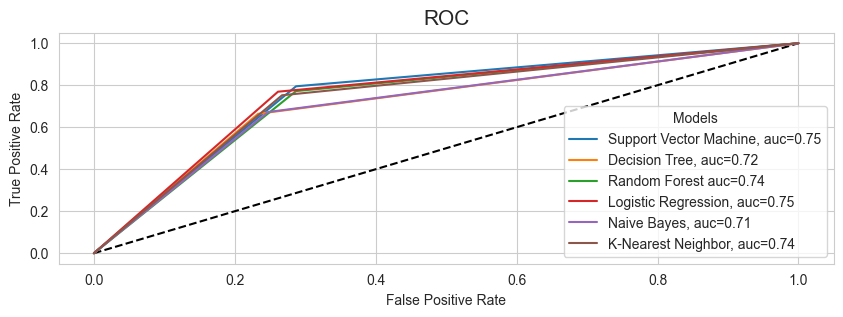

In [75]:
# display as plot
plt.figure(figsize=(10,3))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fp1,tp1,label="Support Vector Machine, auc="+str(round(auc1,2)))
plt.plot(fp2,tp2,label="Decision Tree, auc="+str(round(auc2,2)))
plt.plot(fp3,tp3,label="Random Forest auc="+str(round(auc3,2)))
plt.plot(fp4,tp4,label="Logistic Regression, auc="+str(round(auc4,2)))
plt.plot(fp5,tp5,label="Naive Bayes, auc="+str(round(auc5,2)))
plt.plot(fp6,tp6,label="K-Nearest Neighbor, auc="+str(round(auc6,2)))
plt.legend(loc=4, title='Models', facecolor='White')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(True)

```Statement :```  

From the six classification algorithm, all of them showed good result with 77% except for Decision Tree with 73%.  

An ROC score of 0.77 or higher means that the classifier is able to distinguish between positive and negative cases with a high level of accuracy. It has a good balance between true positive rate (TPR) and false positive rate (FPR) and thus it is able to minimize the number of false negatives and false positives.


### Model Improvement with Predict Probability on Logistic Regression

Area under precision_recall_curve: 0.7558818496424229


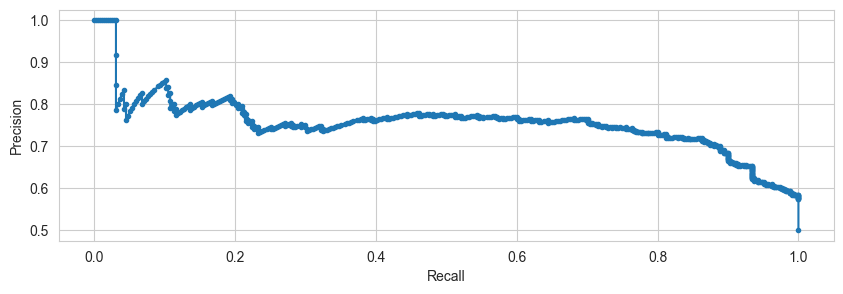

In [82]:
rf = RandomForestClassifier(n_estimators=201,
                                            max_features=7,
                                            max_depth=6,
                                            criterion='entropy').fit(x_train, y_train)

y_proba_rf = rf.predict_proba(x_test)

precision,recall,thresholds=precision_recall_curve(y_test,y_proba_rf[:,1])

plt.figure(figsize=(10,3))
plt.plot(recall, precision, marker='.');
plt.xlabel('Recall')
plt.ylabel('Precision')

print(f'Area under precision_recall_curve: {auc(recall,precision)}')

Best Threshold=0.404655, f1_score=0.784


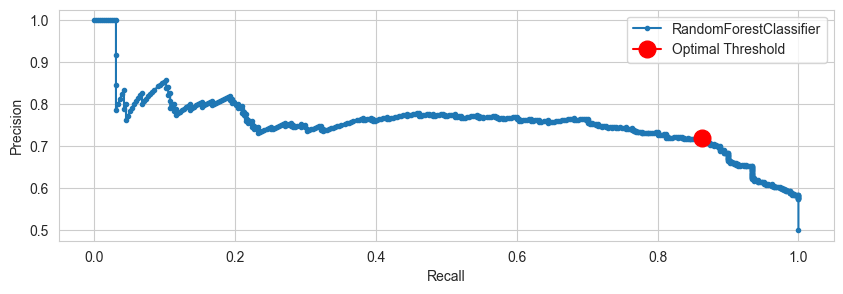

In [83]:
# Finding best threshold

f1_score_rf = 2 * (precision * recall) / (precision + recall)
ix = np.argmax(f1_score_rf)
thresh=thresholds[ix]

plt.figure(figsize=(10,3))
plt.plot(recall, precision, marker='.', label='RandomForestClassifier');
plt.plot(recall[ix],precision[ix],marker='o', markersize=12,color='red',label='Optimal Threshold');
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

print('Best Threshold=%f, f1_score=%.3f' % (thresholds[ix], f1_score_rf[ix]))

Classification report after decreasing false negative : 

               precision    recall  f1-score   support

         0.0       0.83      0.66      0.74       352
         1.0       0.72      0.86      0.78       351

    accuracy                           0.76       703
   macro avg       0.77      0.76      0.76       703
weighted avg       0.77      0.76      0.76       703



Text(8.222222222222218, 0.5, 'True Label')

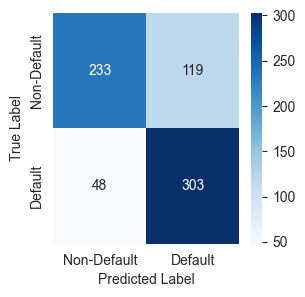

In [89]:
# applying best threshold for predict probability
y_pred_rf_final = (y_proba_rf[:,1]>=thresh)
print(f'Classification report after decreasing false negative : \n\n {classification_report(y_test,y_pred_rf_final)}')

# confusion matrix
val=['Non-Default','Default']
cm_rf = pd.DataFrame(confusion_matrix(y_test,y_pred_rf_final),columns=val,index=val)
plt.figure(figsize=(3,3))
sns.heatmap(cm_rf,annot=True,cbar=True,cmap='Blues',fmt='g');
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

### CONCLUSION

To make cluster predictions using a classification algorithm instead of a clustering algorithm, you would first need to convert your clustering problem into a classification problem. This can be done by using the cluster assignments as the class labels and then training a classifier on the labeled data.

Here are the general steps you can follow:

* Run a clustering algorithm (such as K-means) on your data to determine the cluster assignments of each data point.
* Use the cluster assignments as the class labels to create a labeled dataset.
* Split the labeled dataset into a training set and a test set.
* Train a classification algorithm (such as logistic regression, decision tree, or SVM) on the training set.
* Use the trained classifier to make predictions on the test set.
* Evaluate the performance of the classifier using metrics such as accuracy, precision, recall, and F1-score.

It's worth to note that this approach may not always be appropriate or yield the best results, as clustering and classification are different tasks and have different assumptions. Clustering algorithms group similar data points together, while classification algorithms assign labels to new data points based on previously learned patterns. So, it's important to evaluate the performance of both approaches and choose the one that works best for your specific use-case and problem domain.

___________________________
# VIII. Sales Prediction using regression algorithm

### Load Data from previous section

In [90]:
# Previous clustered dataset
df3.head()

,cluster,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,profit_ratio
0,1,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.960,2.0,0.0,41.9136,16.00
1,1,Second Class,Corporate,California,West,Office Supplies,Labels,14.620,2.0,0.0,6.8714,47.00
2,1,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.368,2.0,0.2,2.5164,11.25
3,1,Standard Class,Consumer,California,West,Furniture,Furnishings,48.860,7.0,0.0,14.1694,29.00
4,1,Standard Class,Consumer,California,West,Office Supplies,Art,7.280,4.0,0.0,1.9656,27.00


In [91]:
# In this section we focus only on cluster 0

df5 = df3.drop(['cluster'], axis=1) # --> we can drop cluster column since it the dataset contains only cluster 0

In [92]:
df5.head()

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,profit_ratio
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.960,2.0,0.0,41.9136,16.00
1,Second Class,Corporate,California,West,Office Supplies,Labels,14.620,2.0,0.0,6.8714,47.00
2,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.368,2.0,0.2,2.5164,11.25
3,Standard Class,Consumer,California,West,Furniture,Furnishings,48.860,7.0,0.0,14.1694,29.00
4,Standard Class,Consumer,California,West,Office Supplies,Art,7.280,4.0,0.0,1.9656,27.00


In [93]:
df5.tail()

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,profit_ratio
7025,Standard Class,Corporate,Georgia,South,Technology,Phones,206.100,5.0,0.0,55.6470,27.00
7026,Second Class,Consumer,Florida,South,Furniture,Furnishings,25.248,3.0,0.2,4.1028,16.25
7027,Standard Class,Consumer,California,West,Furniture,Furnishings,91.960,2.0,0.0,15.6332,17.00
7028,Standard Class,Consumer,California,West,Technology,Phones,258.576,2.0,0.2,19.3932,7.50
7029,Standard Class,Consumer,California,West,Office Supplies,Paper,29.600,4.0,0.0,13.3200,45.00


In [94]:
df5.shape

(7030, 11)

In [95]:
df5.dtypes

Ship Mode        object
Segment          object
State            object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity        float64
Discount        float64
Profit          float64
profit_ratio    float64
dtype: object

### Feature Engineering

In [96]:
# best feature
bf = ['Segment','Region', 'Category', 'Sub-Category', 'Sales', 'Discount','Profit']

num_l = ['Sales', 'Discount','Quantity','Profit']
cat_l = ['Segment','State','Region','Category', 'Sub-Category']

In [97]:
# scaling
scaler = StandardScaler()
x_n_scl1 = scaler.fit_transform(df5[num_l])

# encoding
encoder = OrdinalEncoder()
x_c_enc1 = encoder.fit_transform(df5[cat_l])

# concatenate
dtt = pd.DataFrame(np.concatenate([x_c_enc1, x_n_scl1],axis=1), columns=df5[cat_l].columns.tolist()+df5[num_l].columns.tolist())

# split into target (x) and feature (y)
x = dtt.drop('Sales', axis=1)
y = dtt['Sales']

# split data to train-set and test-set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=15)

print('x_train', x_train.shape)
print('x_test', x_test.shape)

x_train (6327, 8)
x_test (703, 8)


### Linear Regression

In [98]:
linreg = LinearRegression(fit_intercept=True)

linreg.fit(x_train, y_train)

y_pred_train_linreg = linreg.predict(x_train)
y_pred_test_linreg = linreg.predict(x_test)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,y_pred_train_linreg))
print("Mean squared error : ", mean_squared_error(y_train, y_pred_train_linreg))
print("R2 Score:",r2_score(y_train,y_pred_train_linreg))
print("Linear regression score : ", linreg.score(x_train, y_train))

print("\n")

print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,y_pred_test_linreg))
print("Mean squared error : ", mean_squared_error(y_test, y_pred_test_linreg))
print("R2 Score:",r2_score(y_test,y_pred_test_linreg))
print("Linear regression score : ", linreg.score(x_test, y_test))

==================== TRAINING ====================
Mean absolute error: 0.5765002862787971
Mean squared error :  0.7384969849269828
R2 Score: 0.2565208560484097
Linear regression score :  0.2565208560484097


==================== TEST ====================
Mean absolute error: 0.5980115478503624
Mean squared error :  0.7992061508727749
R2 Score: 0.24607404770140262
Linear regression score :  0.24607404770140262


### Improvement on Model Regression

In [99]:
# Model improvement with Random Forest Regressor

rfg = RandomForestRegressor()

# Use cross-validation to evaluate the models
scores_linreg = cross_val_score(linreg, x_test, y_test, cv=5)
scores_rfg = cross_val_score(rfg, x_test, y_test, cv=5)

# results
print(f"Linear Regression R2 Score: {scores_linreg.mean():.2f} +/- {scores_linreg.std():.2f}")
print(f"Random Forest R2 Score: {scores_rfg.mean():.2f} +/- {scores_rfg.std():.2f}")

Linear Regression R2 Score: 0.21 +/- 0.08
Random Forest R2 Score: 0.52 +/- 0.08


In [100]:
# Model improvement with Decision Tree Regressor

dtr = DecisionTreeRegressor()

# Use cross-validation to evaluate the models
scores_linreg = cross_val_score(linreg, x_test, y_test, cv=5)
scores_dtr = cross_val_score(dtr, x_test, y_test, cv=5)

# results
print(f"Linear Regression R2 Score: {scores_linreg.mean():.2f} +/- {scores_linreg.std():.2f}")
print(f"Random Forest R2 Score: {scores_dtr.mean():.2f} +/- {scores_dtr.std():.2f}")

Linear Regression R2 Score: 0.21 +/- 0.08
Random Forest R2 Score: 0.24 +/- 0.12


In [101]:
# Model improvement with Gradient Booster Regressor
gbr = GradientBoostingRegressor()

# Use cross-validation to evaluate the models
scores_linreg = cross_val_score(linreg, x_test, y_test, cv=5)
scores_gbr = cross_val_score(gbr, x_test, y_test, cv=5)

# results
print(f"Linear Regression R2 Score: {scores_linreg.mean():.2f} +/- {scores_linreg.std():.2f}")
print(f"Random Forest R2 Score: {scores_gbr.mean():.2f} +/- {scores_gbr.std():.2f}")

Linear Regression R2 Score: 0.21 +/- 0.08
Random Forest R2 Score: 0.59 +/- 0.09


```Regression model Summary :```  



_______________
# IX. Model Inference

In [102]:
df3.columns.tolist()

['cluster',
 'Ship Mode',
 'Segment',
 'State',
 'Region',
 'Category',
 'Sub-Category',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'profit_ratio']

In [167]:
# generate random data
rng = np.random.default_rng(seed=np.random.randint(np.random.randint(1,100),np.random.randint(100,1000)))

cluster = rng.choice(df3['cluster'].unique().tolist(), size=100)
ShipMode = rng.choice(df3['Ship Mode'].unique().tolist(), size=100)
Segment = rng.choice(df3['Segment'].unique().tolist(), size=100)
State = rng.choice(df3['State'].unique().tolist(), size=100)
Region = rng.choice(df3['Region'].unique().tolist(), size=100)
Category = rng.choice(df3['Category'].unique().tolist(), size=100)
SubCategory = rng.choice(df3['Sub-Category'].unique().tolist(), size=100)
Sales = rng.uniform(df3['Sales'].min(), df3['Sales'].max(), size=100).round(2)
Quantity = rng.uniform(df3['Quantity'].min(), df3['Quantity'].max(), size=100).round()
Discount = rng.uniform(df3['Discount'].min(), df3['Discount'].max(), size=100).round(1)
Profit = rng.uniform(df3['Profit'].min(), df3['Profit'].max(), size=100).round(2)

df_inf = pd.DataFrame({
    'Ship Mode' : ShipMode,
    'Segment' : Segment,
    'State' : State,
    'Region' : Region,
    'Category' : Category,
    'Sub-Category' : SubCategory,
    'Sales' : Sales,
    'Quantity' : Quantity,
    'Discount' : Discount,
    'Profit' : Profit})

In [168]:
df_inf.head()

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,First Class,Consumer,Nebraska,Central,Technology,Storage,35.44,6.0,0.2,-25.29
1,First Class,Consumer,Mississippi,Central,Technology,Machines,105.89,4.0,0.2,31.21
2,Same Day,Home Office,Montana,Central,Technology,Supplies,409.04,7.0,0.3,64.94
3,First Class,Consumer,North Dakota,Central,Technology,Appliances,372.83,3.0,0.1,33.67
4,Standard Class,Corporate,Oregon,East,Technology,Machines,208.88,2.0,0.4,24.01


In [169]:
# save data inference to csv
df_inf.to_csv('xdata_inference_p1ms2.csv', encoding='utf-8')

In [170]:
# Save model to local directory

with open('model_scaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1)
  
with open('model_kmeans.pkl', 'wb') as file_2:
  pickle.dump(km_2, file_2)

with open('cluster_labels.pkl', 'wb') as file_3:
  pickle.dump(labels_2, file_3)
  
with open('model_rf.pkl', 'wb') as file_4:
  pickle.dump(pipe_rf, file_4)
  
with open('model_gbr.pkl', 'wb') as file_5:
  pickle.dump(gbr, file_5) 

________________
# X. Cluster Result Comparison

### Data Inference with K-Means Clustering

In [171]:
# Previous clustered dataset

df_inf.head()

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,First Class,Consumer,Nebraska,Central,Technology,Storage,35.44,6.0,0.2,-25.29
1,First Class,Consumer,Mississippi,Central,Technology,Machines,105.89,4.0,0.2,31.21
2,Same Day,Home Office,Montana,Central,Technology,Supplies,409.04,7.0,0.3,64.94
3,First Class,Consumer,North Dakota,Central,Technology,Appliances,372.83,3.0,0.1,33.67
4,Standard Class,Corporate,Oregon,East,Technology,Machines,208.88,2.0,0.4,24.01


In [172]:
# scaling numerical only, concatenate, assign to new dataframe
df_inf2 = pd.DataFrame(
    np.concatenate(
        [pd.DataFrame(encoder.fit_transform(df_inf[cat_list])), pd.DataFrame(scaler.fit_transform(df_inf[num_list]))], 
        axis=1), 
    columns=df_inf[cat_list].columns.tolist()+df_inf[num_list].columns.tolist()).round(2)

In [173]:
df_inf2.head()

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,0.0,0.0,24.0,0.0,2.0,14.0,-1.75,0.47,-0.08,-1.39
1,0.0,0.0,21.0,0.0,2.0,11.0,-1.24,-0.37,-0.08,0.46
2,1.0,2.0,23.0,0.0,2.0,15.0,0.98,0.88,0.62,1.57
3,0.0,0.0,29.0,0.0,2.0,1.0,0.71,-0.78,-0.78,0.54
4,3.0,1.0,32.0,1.0,2.0,11.0,-0.48,-1.20,1.32,0.23


In [174]:
cluster_inf = pd.DataFrame(km_2.fit_predict(df_inf2), columns=['cluster_inf'])
df_inf3 = pd.DataFrame(np.concatenate([cluster_inf, df_inf], axis=1), columns=['cluster_inf']+df_inf.columns.tolist())


In [175]:
df_inf3.head()

,cluster_inf,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,0,First Class,Consumer,Nebraska,Central,Technology,Storage,35.44,6.0,0.2,-25.29
1,0,First Class,Consumer,Mississippi,Central,Technology,Machines,105.89,4.0,0.2,31.21
2,0,Same Day,Home Office,Montana,Central,Technology,Supplies,409.04,7.0,0.3,64.94
3,0,First Class,Consumer,North Dakota,Central,Technology,Appliances,372.83,3.0,0.1,33.67
4,0,Standard Class,Corporate,Oregon,East,Technology,Machines,208.88,2.0,0.4,24.01


0    52
1    48
Name: cluster_inf, dtype: int64

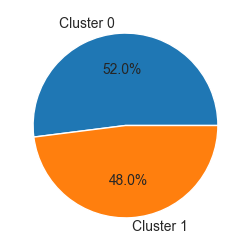

In [181]:
# Cluster distribution

fig, ax = plt.subplots(figsize=(3,3))
ax.pie(df_inf3['cluster_inf'].value_counts(),labels=['Cluster 0 ','Cluster 1'],autopct='%0.1f%%')
df_inf3['cluster_inf'].value_counts()


### Predicting cluster with Random Forest

In [177]:
df_inf4 = df_inf3[['cluster_inf','Segment','Region', 'Category', 'Sub-Category', 'Sales', 'Discount','Profit']]
numlist = ['Sales', 'Discount','Profit']
catlist = ['Segment','Region','Category', 'Sub-Category']

In [178]:
df_inf4.head()

,cluster_inf,Segment,Region,Category,Sub-Category,Sales,Discount,Profit
0,0,Consumer,Central,Technology,Storage,35.44,0.2,-25.29
1,0,Consumer,Central,Technology,Machines,105.89,0.2,31.21
2,0,Home Office,Central,Technology,Supplies,409.04,0.3,64.94
3,0,Consumer,Central,Technology,Appliances,372.83,0.1,33.67
4,0,Corporate,East,Technology,Machines,208.88,0.4,24.01


In [179]:
# scaling
scaler = StandardScaler()
xn_scl = scaler.fit_transform(df_inf4[numlist])

# encoding
encoder = OrdinalEncoder()
xc_enc = encoder.fit_transform(df_inf4[catlist])

# concatenate
dtt2 = pd.DataFrame(np.concatenate([xc_enc, xn_scl],axis=1), columns=df_inf4[catlist].columns.tolist()+df_inf4[numlist].columns.tolist())

1.0    59
0.0    41
dtype: int64


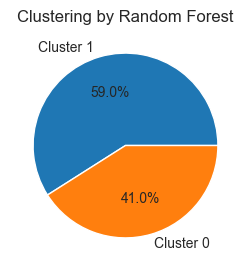

In [180]:
# Cluster distribution

fig, ax = plt.subplots(figsize=(3,3))
ax.pie(pd.DataFrame(pipe_rf.predict(dtt2)).value_counts(),labels=['Cluster 1 ','Cluster 0'],autopct='%0.1f%%')
plt.title("Clustering by Random Forest")

print(pd.DataFrame(pipe_rf.predict(dtt2)).value_counts())